In [6]:
import rubin_sim.maf.metricBundles as metricBundles
import rubin_sim.maf.slicers as slicers
import rubin_sim.maf.db as db
import rubin_sim.maf.utils as utils
import rubin_sim.maf.metrics as metrics
import sqlite3
import numpy as np
from rubin_sim.maf.metrics.snNSNMetric import SNNSNMetric
import healpy as hp
%matplotlib inline
import glob
import matplotlib.pylab as plt
from rubin_sim.utils import calcSeason

In [2]:
dbfiles = glob.glob('baseline*nexp2*10yrs.db')
dbfiles.sort()

In [3]:
filename=dbfiles[0]
opsimdb = db.OpsimDatabase(dbfiles[0])
runname = filename.replace('_10yrs.db', '')
outDir = runname
resultsDb = db.ResultsDb(outDir=outDir)



In [4]:
bundleList = []

ra = 0
dec = -20

sql=''
metric = metrics.PassMetric(cols=['observationStartMJD','fieldRA','fieldDec',
                 'filter', 'fiveSigmaDepth', 'visitExposureTime',
                 'night', 'observationId', 'numExposures',
                 'visitTime'])
slicer = slicers.UserPointsSlicer(ra=ra, dec=dec)

bundleList.append(metricBundles.MetricBundle(metric, slicer,sql,runName=runname))
bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
bgroup = metricBundles.MetricBundleGroup(bundleDict, opsimdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
# bgroup.plotAll(closefigs=False)

Querying database SummaryAllProps with no constraint for columns ['observationStartMJD', 'visitExposureTime', 'numExposures', 'visitTime', 'night', 'fieldRA', 'observationId', 'fiveSigmaDepth', 'filter', 'fieldDec'].
Found 2044984 visits
Running:  ['baseline_nexp2_v1_7_1_Pass_observationStartMJD_fieldRA_fieldDec_filter_fiveSigmaDepth_visitExposureTime_night_observationId_numExposures_visitTime_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [8]:
bundleList[0].metricValues[0]['observationStartMJD']
mjd = np.sort(bundleList[0].metricValues[0]['observationStartMJD'] + 0)

In [9]:
mjd

array([59858.24103262, 59858.25595636, 59862.23694292, 59862.25306213,
       59863.21322555, 59863.22951712, 59865.17701683, 59865.19390805,
       59865.23888357, 59865.25520476, 59869.18033727, 59869.19676505,
       59870.08934675, 59870.10615675, 59870.20997422, 59870.2264756 ,
       59871.14513195, 59871.14562742, 59871.16188535, 59871.16235335,
       59875.15066621, 59875.15528682, 59875.16707162, 59875.17164008,
       59875.25530696, 59875.27145889, 59876.05611488, 59876.07168685,
       59876.14918252, 59876.16553497, 59884.03371535, 59884.03791605,
       59884.05064962, 59884.05496512, 59895.01121583, 59906.08538842,
       59906.10200531, 59912.03196159, 59918.0490335 , 59918.06468112,
       59919.04534926, 59921.08240328, 59921.09723133, 59925.031614  ,
       60120.41414603, 60126.3580608 , 60126.35851221, 60126.37513823,
       60126.37559987, 60126.39881273, 60126.41230479, 60127.38309861,
       60127.39755267, 60137.43451576, 60137.44380888, 60164.38243088,
      

In [10]:
seasons = calcSeason(ra, mjd)

In [11]:
seasons

array([ 0.53625197,  0.53629283,  0.54719218,  0.54723631,  0.54986509,
        0.5499097 ,  0.55524166,  0.55528791,  0.55541104,  0.55545573,
        0.56620216,  0.56624713,  0.56869089,  0.56873691,  0.56902115,
        0.56906633,  0.57158147,  0.57158283,  0.57162734,  0.57162862,
        0.58254803,  0.58256068,  0.58259294,  0.58260545,  0.58283452,
        0.58287874,  0.58502701,  0.58506964,  0.58528181,  0.58532658,
        0.60686849,  0.60687999,  0.60691485,  0.60692667,  0.63692325,
        0.66724268,  0.66728817,  0.68352351,  0.69999735,  0.70004019,
        0.70272512,  0.70830227,  0.70834286,  0.71911462,  1.25404284,
        1.27031639,  1.27031762,  1.27036314,  1.27036441,  1.27042796,
        1.2704649 ,  1.27312279,  1.27316236,  1.30064207,  1.30066751,
        1.37442144,  1.37442267,  1.37446615,  1.37446738,  1.40447713,
        1.40452253,  1.42598814,  1.42601797,  1.42603476,  1.42606587,
        1.42628724,  1.42632819,  1.46695705,  1.46700322,  1.47

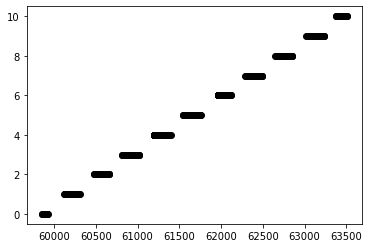

In [15]:
plt.plot(mjd, np.floor(seasons), 'ko')

In [16]:
seasons = calcSeason(359, mjd)

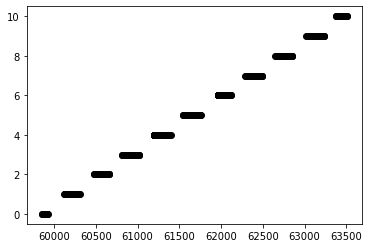

In [17]:
plt.plot(mjd, np.floor(seasons), 'ko')